In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [2]:
# Univers

Bright = ctrl.Antecedent(np.arange(0, 30, 1), 'Brightness') # lx
Temp = ctrl.Antecedent(np.arange(0,50,0.5),'Temperature')
L_inten = ctrl.Consequent(np.arange(0, 30, 1), 'Light intensity') # cd

In [3]:
Bright['low'] = fuzz.trimf(Bright.universe, [0, 0, 12])
Bright['medium'] = fuzz.trimf(Bright.universe, [8, 15, 22])
Bright['high'] = fuzz.trimf(Bright.universe, [18, 30, 30])
#=====================================================================
Temp['cool'] = fuzz.trapmf(Temp.universe,[0,0,15,25])
Temp['warm'] = fuzz.trapmf(Temp.universe,[18,20,30,33])
Temp['hot'] = fuzz.trapmf(Temp.universe,[31,35,50,50])
#=====================================================================
L_inten['off'] = fuzz.trapmf(L_inten.universe,[0,0,5,12])
L_inten['half_on'] = fuzz.trapmf(L_inten.universe,[8,12,18,22])
L_inten['full_on'] = fuzz.trapmf(L_inten.universe,[18,25,30,30])


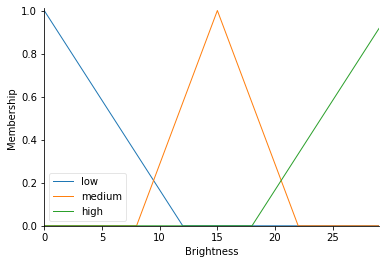

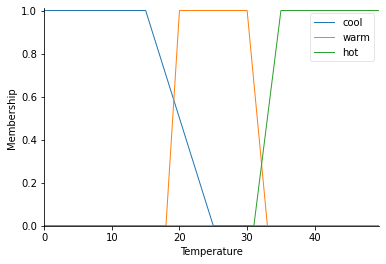

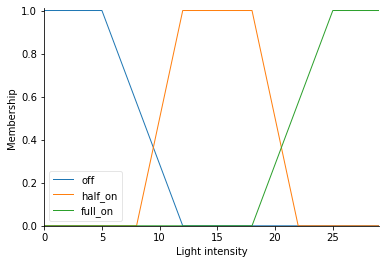

In [4]:
Bright.view()
Temp.view()
L_inten.view()


In [5]:
rule1 = ctrl.Rule(Bright['low'] & Temp['cool'],L_inten['full_on'])
rule2 = ctrl.Rule(Bright['low'] & Temp['warm'],L_inten['full_on'])
rule3 = ctrl.Rule(Bright['low'] & Temp['hot'],L_inten['half_on'])
rule4 = ctrl.Rule(Bright['medium'] & Temp['cool'],L_inten['full_on'])
rule5 = ctrl.Rule(Bright['medium'] & Temp['warm'],L_inten['half_on'])
rule6 = ctrl.Rule(Bright['medium'] & Temp['hot'],L_inten['off'])
rule7 = ctrl.Rule(Bright['high'] & Temp['cool'],L_inten['half_on'])
rule8 = ctrl.Rule(Bright['high'] & Temp['warm'],L_inten['off'])
rule9 = ctrl.Rule(Bright['high'] & Temp['hot'],L_inten['off'])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

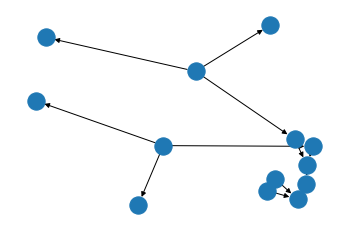

In [6]:
rule2.view()

In [7]:
light_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9])
lighting = ctrl.ControlSystemSimulation(light_ctrl)

In [13]:
lighting.input['Brightness'] = 10
lighting.input['Temperature'] = 40

In [14]:
lighting.compute()

9.399274376417234


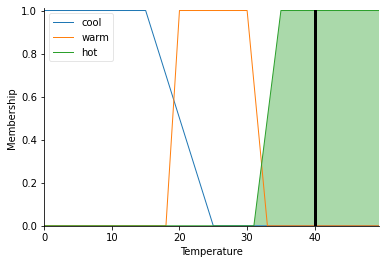

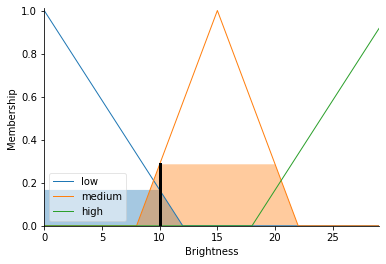

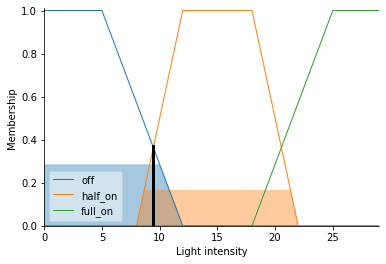

In [15]:
print(lighting.output['Light intensity'])
Temp.view(sim=lighting)
Bright.view(sim=lighting)
L_inten.view(sim=lighting)